In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:\Desktop\Assignment 3\s.csv')

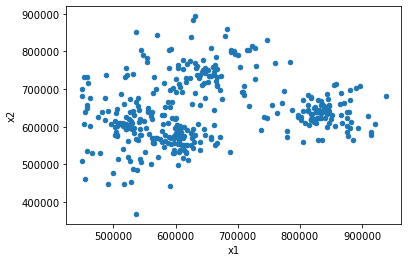

In [3]:
data.plot.scatter('x1', 'x2');

In [4]:
X = data['x1']
Y = data['x2']

In [5]:
import math
loss = []
cur_loss = []
for i, j in zip(X,Y):
    for n, m in zip(X,Y):
        cur_loss.append(math.sqrt((((n - i )**2) + ((m-j)**2) )))
    loss.append(cur_loss)
    cur_loss = []

In [7]:
proximity_matrix = pd.DataFrame(np.array(loss))

In [8]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

In [10]:
import sys
np.fill_diagonal(proximity_matrix.to_numpy(),np.nan)
df = proximity_matrix.copy()

In [11]:
( np.nan + 2 )/2

nan

In [12]:
maxi = 0
length = 400
spare = pd.DataFrame([i for i in range(400)])
used = []
while len(df.columns) > 4:
    search = df.min().min()
    indices = getIndexes(df, search)
    label1 = indices[0][0]
    label2 = indices[0][1]
    used.append(label1)
    used.append(label2)
    if type(label1) == int and type(label2) == int:
        #df[(label1, label2)] = list(zip(proximity_matrix[label1], proximity_matrix[label2]))
        df[(label1,label2)] = [(i+j)/2 for i, j in zip(df[label1], df[label2])]
        df = df.append(df[(label1,label2)].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == int and type(label2) == tuple:
        #df[(label1)] = list(zip(df[label1]))
        #df[tuple(list(label2) + [label1])] = df[label2] + df[(label1)]
        df[tuple(list(label2) + [label1])] = [(i+j)/2 for i, j in zip(df[label1], df[label2])]
        df = df.append(df[tuple(list(label2) + [label1])].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == tuple and type(label2) == int:
        #df[(label2)] = list(zip(df[label2]))
        #df[tuple(list(label1) + [label2])] = df[label1] + df[(label2)]
        df[tuple(list(label1) + [label2])] = [(i+j)/2 for i, j in zip(df[label1], df[label2])]
        df = df.append(df[tuple(list(label1) + [label2])].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == tuple and type(label2) == tuple:
        #df[label1 + label2] = df[label1] + df[label2]
        df[label1 + label2] = [(i+j)/2 for i, j in zip(df[label1], df[label2])]
        df = df.append(df[label1 + label2].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)

In [13]:
df

,"(173, 100, 112, 194, 129, 104, 149, 180, 168, 150, 140, 193, 169, 134, 126, 175, 101, 109, 122, 121, 167, 118, 136, 189, 115, 148, 114, 162, 185, 165, 183, 182, 184, 166, 106, 161, 152, 164, 147, 190, 144, 160, 157, 181, 105, 197, 127, 171, 110, 192, 139, 116, 195, 146, 128, 156, 346, 321, 151, 387, 191, 199, 159, 198, 120, 108, 107, 196, 131, 187, 124, 153, 138, 111, 117, 141, 123, 172, 155, 178, 133, 188, 179, 186, 170, 135, 113, 174, 154, 137, 125, 102, 130, 119, 145, 143, 132, 158, 176, 142, ...)","(286, 221, 275, 210, 278, 217, 247, 351, 320, 382, 369, 272, 218, 202, 307, 273, 303, 291, 288, 282, 266, 219, 244, 227, 239, 216, 240, 258, 200, 367, 312, 313, 302, 344, 83, 380, 301, 392, 339, 325, 361, 360, 373, 384, 310, 336, 366, 311, 374, 334, 306, 378, 348, 323, 342, 326, 305, 345, 353, 304, 370, 341, 391, 362, 343, 331, 398, 357, 376, 390, 388, 314, 315, 324, 285, 222, 297, 229, 287, 51, 231, 211, 284, 279, 255, 316, 47, 73, 54, 77, 58, 44, 246, 226, 249, 88, 318, 208, 377, 250, ...)","(340, 300, 365, 332, 393, 375, 396, 294, 356, 319, 349, 309, 389, 385, 338, 177, 322, 363, 355, 394, 337, 368, 335, 397, 371, 386, 328, 379, 329, 327, 308, 399, 330)","(277, 257, 281, 260, 220, 293, 215, 241, 262, 268, 238, 283, 265, 234, 206, 263, 261, 292, 271, 269, 298, 248, 207, 289, 245, 253, 224, 225, 213, 212, 242, 236, 201, 243, 230, 267, 251, 259, 228, 232, 45, 209, 296, 290, 237, 233, 62, 299, 75, 204, 52, 235, 223, 214, 254, 205, 33, 8, 270, 256, 252, 32, 22, 43, 86, 65, 70, 35, 39, 40, 3, 94, 80, 87, 68, 13, 71, 69, 63, 72, 30, 67, 49, 38, 24, 274, 5, 6, 264, 26, 203, 29, 93, 280, 79, 276, 85, 99, 295, 10, ...)"
"(173, 100, 112, 194, 129, 104, 149, 180, 168, 150, 140, 193, 169, 134, 126, 175, 101, 109, 122, 121, 167, 118, 136, 189, 115, 148, 114, 162, 185, 165, 183, 182, 184, 166, 106, 161, 152, 164, 147, 190, 144, 160, 157, 181, 105, 197, 127, 171, 110, 192, 139, 116, 195, 146, 128, 156, 346, 321, 151, 387, 191, 199, 159, 198, 120, 108, 107, 196, 131, 187, 124, 153, 138, 111, 117, 141, 123, 172, 155, 178, 133, 188, 179, 186, 170, 135, 113, 174, 154, 137, 125, 102, 130, 119, 145, 143, 132, 158, 176, 142, ...)",NaN,305019.537822,260040.995228,289054.947299
"(286, 221, 275, 210, 278, 217, 247, 351, 320, 382, 369, 272, 218, 202, 307, 273, 303, 291, 288, 282, 266, 219, 244, 227, 239, 216, 240, 258, 200, 367, 312, 313, 302, 344, 83, 380, 301, 392, 339, 325, 361, 360, 373, 384, 310, 336, 366, 311, 374, 334, 306, 378, 348, 323, 342, 326, 305, 345, 353, 304, 370, 341, 391, 362, 343, 331, 398, 357, 376, 390, 388, 314, 315, 324, 285, 222, 297, 229, 287, 51, 231, 211, 284, 279, 255, 316, 47, 73, 54, 77, 58, 44, 246, 226, 249, 88, 318, 208, 377, 250, ...)",305019.537822,NaN,202466.798758,217549.971241
"(340, 300, 365, 332, 393, 375, 396, 294, 356, 319, 349, 309, 389, 385, 338, 177, 322, 363, 355, 394, 337, 368, 335, 397, 371, 386, 328, 379, 329, 327, 308, 399, 330)",260040.995228,202466.798758,NaN,335250.109543
"(277, 257, 281, 260, 220, 293, 215, 241, 262, 268, 238, 283, 265, 234, 206, 263, 261, 292, 271, 269, 298, 248, 207, 289, 245, 253, 224, 225, 213, 212, 242, 236, 201, 243, 230, 267, 251, 259, 228, 232, 45, 209, 296, 290, 237, 233, 62, 299, 75, 204, 52, 235, 223, 214, 254, 205, 33, 8, 270, 256, 252, 32, 22, 43, 86, 65, 70, 35, 39, 40, 3, 94, 80, 87, 68, 13, 71, 69, 63, 72, 30, 67, 49, 38, 24, 274, 5, 6, 264, 26, 203, 29, 93, 280, 79, 276, 85, 99, 295, 10, ...)",289054.947299,217549.971241,335250.109543,NaN


In [14]:
data['id'] = pd.DataFrame([i for i in range(400)])

# in this section I will plot the 4 clusters with different colors to compare the average method and the maximum method

In [15]:
l = df.columns.to_list()

In [16]:
data['label1'] = data.id.map(lambda x: 'r' if x in l[0] else '')

In [17]:
data['label2'] = data.id.map(lambda x: 'b' if x in l[1] else '')

In [18]:
data['label3'] = data.id.map(lambda x: 'y' if x in l[2] else '')

In [19]:
data['label4'] = data.id.map(lambda x: 'm' if x in l[3] else '')

In [20]:
data

,x1,x2,id,label1,label2,label3,label4
0,664159,550946,0,,,,m
1,665845,557965,1,,,,m
2,597173,575538,2,,,,m
3,618600,551446,3,,,,m
4,635690,608046,4,,,,m
...,...,...,...,...,...,...,...
395,616325,730469,395,,b,,
396,554610,782542,396,,,y,
397,727303,809509,397,,,y,
398,603709,757145,398,,b,,


In [21]:
data['label'] = data['label1'] + data['label2'] + data['label3'] + data['label4']
data

,x1,x2,id,label1,label2,label3,label4,label
0,664159,550946,0,,,,m,m
1,665845,557965,1,,,,m,m
2,597173,575538,2,,,,m,m
3,618600,551446,3,,,,m,m
4,635690,608046,4,,,,m,m
...,...,...,...,...,...,...,...,...
395,616325,730469,395,,b,,,b
396,554610,782542,396,,,y,,y
397,727303,809509,397,,,y,,y
398,603709,757145,398,,b,,,b


# Good results however the maximum method yielded 4 better clusters

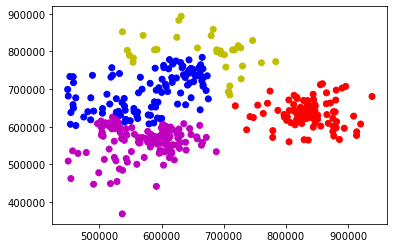

In [22]:
plt.scatter(data['x1'], data['x2'], c = data['label'].to_list())

In [38]:
data = pd.read_csv('D:\Desktop\Assignment 3\s.csv')

In [39]:
import sys
np.fill_diagonal(proximity_matrix.to_numpy(),np.nan)
df = proximity_matrix.copy()

In [40]:
maxi = 0
length = 400
spare = pd.DataFrame([i for i in range(400)])
used = []
while len(df.columns) > 2:
    search = df.min().min()
    indices = getIndexes(df, search)
    label1 = indices[0][0]
    label2 = indices[0][1]
    used.append(label1)
    used.append(label2)
    if type(label1) == int and type(label2) == int:
        #df[(label1, label2)] = list(zip(proximity_matrix[label1], proximity_matrix[label2]))
        df[(label1,label2)] = [(i+j)/2 for i, j in zip(df[label1], df[label2])]
        df = df.append(df[(label1,label2)].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == int and type(label2) == tuple:
        #df[(label1)] = list(zip(df[label1]))
        #df[tuple(list(label2) + [label1])] = df[label2] + df[(label1)]
        df[tuple(list(label2) + [label1])] = [(i+j)/2 for i, j in zip(df[label1], df[label2])]
        df = df.append(df[tuple(list(label2) + [label1])].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == tuple and type(label2) == int:
        #df[(label2)] = list(zip(df[label2]))
        #df[tuple(list(label1) + [label2])] = df[label1] + df[(label2)]
        df[tuple(list(label1) + [label2])] = [(i+j)/2 for i, j in zip(df[label1], df[label2])]
        df = df.append(df[tuple(list(label1) + [label2])].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == tuple and type(label2) == tuple:
        #df[label1 + label2] = df[label1] + df[label2]
        df[label1 + label2] = [(i+j)/2 for i, j in zip(df[label1], df[label2])]
        df = df.append(df[label1 + label2].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)

In [41]:
df

,"(173, 100, 112, 194, 129, 104, 149, 180, 168, 150, 140, 193, 169, 134, 126, 175, 101, 109, 122, 121, 167, 118, 136, 189, 115, 148, 114, 162, 185, 165, 183, 182, 184, 166, 106, 161, 152, 164, 147, 190, 144, 160, 157, 181, 105, 197, 127, 171, 110, 192, 139, 116, 195, 146, 128, 156, 346, 321, 151, 387, 191, 199, 159, 198, 120, 108, 107, 196, 131, 187, 124, 153, 138, 111, 117, 141, 123, 172, 155, 178, 133, 188, 179, 186, 170, 135, 113, 174, 154, 137, 125, 102, 130, 119, 145, 143, 132, 158, 176, 142, ...)","(340, 300, 365, 332, 393, 375, 396, 294, 356, 319, 349, 309, 389, 385, 338, 177, 322, 363, 355, 394, 337, 368, 335, 397, 371, 386, 328, 379, 329, 327, 308, 399, 330, 286, 221, 275, 210, 278, 217, 247, 351, 320, 382, 369, 272, 218, 202, 307, 273, 303, 291, 288, 282, 266, 219, 244, 227, 239, 216, 240, 258, 200, 367, 312, 313, 302, 344, 83, 380, 301, 392, 339, 325, 361, 360, 373, 384, 310, 336, 366, 311, 374, 334, 306, 378, 348, 323, 342, 326, 305, 345, 353, 304, 370, 341, 391, 362, 343, 331, 398, ...)"
"(173, 100, 112, 194, 129, 104, 149, 180, 168, 150, 140, 193, 169, 134, 126, 175, 101, 109, 122, 121, 167, 118, 136, 189, 115, 148, 114, 162, 185, 165, 183, 182, 184, 166, 106, 161, 152, 164, 147, 190, 144, 160, 157, 181, 105, 197, 127, 171, 110, 192, 139, 116, 195, 146, 128, 156, 346, 321, 151, 387, 191, 199, 159, 198, 120, 108, 107, 196, 131, 187, 124, 153, 138, 111, 117, 141, 123, 172, 155, 178, 133, 188, 179, 186, 170, 135, 113, 174, 154, 137, 125, 102, 130, 119, 145, 143, 132, 158, 176, 142, ...)",NaN,285792.606912
"(340, 300, 365, 332, 393, 375, 396, 294, 356, 319, 349, 309, 389, 385, 338, 177, 322, 363, 355, 394, 337, 368, 335, 397, 371, 386, 328, 379, 329, 327, 308, 399, 330, 286, 221, 275, 210, 278, 217, 247, 351, 320, 382, 369, 272, 218, 202, 307, 273, 303, 291, 288, 282, 266, 219, 244, 227, 239, 216, 240, 258, 200, 367, 312, 313, 302, 344, 83, 380, 301, 392, 339, 325, 361, 360, 373, 384, 310, 336, 366, 311, 374, 334, 306, 378, 348, 323, 342, 326, 305, 345, 353, 304, 370, 341, 391, 362, 343, 331, 398, ...)",285792.606912,NaN


In [42]:
data['id'] = pd.DataFrame([i for i in range(400)])

In [43]:
l = df.columns.to_list()

In [44]:
data['label1'] = data.id.map(lambda x: 'r' if x in l[0] else '')

In [45]:
data['label2'] = data.id.map(lambda x: 'b' if x in l[1] else '')

In [46]:
data['label'] = data['label1'] + data['label2']

# almost the same as the minimum method the only difference is in one point

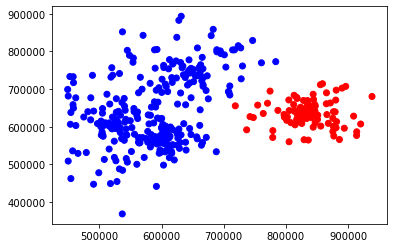

In [47]:
plt.scatter(data['x1'], data['x2'], c = data['label'].to_list())

# results: the minimum method is the best out of the three methods and then the average and then the maximum.